In [163]:
import os
import random
import numpy as np
from PIL import Image, ImageEnhance, ImageDraw, ImageStat
from tqdm import tqdm
import threading
import math
import time
import threading

import random_perspective
import convert
import local_brightness

In [2]:
def adjust_brigthness(image,brightness_factor):

    bright_enhancer = ImageEnhance.Brightness(image)
    image = bright_enhancer.enhance(brightness_factor)
    return image

In [3]:
def adjust_contrast(image,contrast_factor):

    contrast_enhancer = ImageEnhance.Contrast(image)
    image = contrast_enhancer.enhance(contrast_factor)
    return image

In [89]:
input_path = "./data/signs/hq/3.png"
output_path = "./data/output/"
image = Image.open(input_path)
image = image.convert("RGBA")


In [9]:
image_bright = adjust_brigthness(image,1.8)
image_bright.save(os.path.join(output_path,"bright.png"))
image_dark = adjust_brigthness(image,0.2)
image_dark.save(os.path.join(output_path,"dark.png"))

In [10]:
high_contrast = adjust_contrast(image,1.8)
high_contrast.save(os.path.join(output_path,"high_contrast.png"))

low_contrast = adjust_contrast(image,0.2)
low_contrast.save(os.path.join(output_path,"low_contrast.png"))

In [13]:
def apply_random_noise(image):

    mean = 0
    standard_deviation = 10

    image_data = np.array(image)

    # Add Gaussian noise with mean 0 and standard deviation 10 to the image
    noise = np.random.normal(mean, standard_deviation, image_data.shape)

    noisy_image = image_data + noise

    # Clip the noisy pixels to the valid range
    noisy_image = np.clip(noisy_image, 0, 255)

    # Convert the noisy image back to a PIL image
    noisy_image = Image.fromarray(noisy_image.astype("uint8"))

    return noisy_image

In [16]:
noisy1 = apply_random_noise(image)
noisy1.save(os.path.join(output_path,"noisy1.png"))
noisy2 = apply_random_noise(image)
noisy2.save(os.path.join(output_path,"noisy2.png"))

In [17]:
def add_light(image,parallel):
    cv2image = convert.pil_to_opencv(image)
    if parallel:
        transformed = local_brightness.add_parallel_light(cv2image)
    else:
        transformed = local_brightness.add_spot_light(cv2image)
    pil_image = convert.opencv_to_pil(transformed)
    
    return pil_image

In [22]:
parallel_light = add_light(image,True)
parallel_light.save(os.path.join(output_path,"parallel_light.png"))

spot_light = add_light(image,True)
spot_light.save(os.path.join(output_path,"spot_light.png"))

In [23]:
def cutout(image,args):
    cutout_area = 0.2 # in % of image width/height
    cutout_colors = [(255, 255, 255, 0),(0, 0, 0)] # Transparent, Black
    if "cutout_area" in args:
        cutout_area = args["cutout_area"]
    if "cutout_colors" in args:
        cutout_colors = args["cutout_colors"]

    width,height = image.size
    max_cutout_width = int(cutout_area * width)
    max_cutout_height = int(cutout_area * height)

    cutout_width = random.randint(0,max_cutout_width)
    cutout_height = random.randint(0,max_cutout_height)

    cutout_x = random.randint(0,width-cutout_width)
    cutout_y = random.randint(0,height-cutout_height)

    img = ImageDraw.Draw(image)
    shape = [(cutout_x,cutout_y),(cutout_x+cutout_width,cutout_y+cutout_height)]

    color = random.choice(cutout_colors)
    img.rectangle(shape,fill=color)
    return image

In [30]:
cutout1 = cutout(image.copy(),{"cutout_area":0.4})
cutout2 = cutout(image.copy(),{"cutout_area":0.4})
cutout1.save(os.path.join(output_path,"cutout1.png"))
cutout2.save(os.path.join(output_path,"cutout2.png"))

In [32]:
def random_perspective_transform(image,args):
    cv2image = convert.pil_to_opencv(image)
    transformed = random_perspective.random_perspective_transformation(cv2image)
    return convert.opencv_to_pil(transformed)

In [40]:
pers1 = random_perspective_transform(image,{})
pers2 = random_perspective_transform(image,{})
pers1.save(os.path.join(output_path,"pers1.png"))
pers2.save(os.path.join(output_path,"pers2.png"))

In [43]:
def random_rotation(image,args):
    expand = 1
    max_angle = 30
    if "expand" in args:
        expand = args["expand"]
    if "max_angle" in args:
        max_angle = args["max_angle"]
    
    angle = random.uniform(-1*max_angle, max_angle)
    image = image.rotate(angle,expand=expand)

    return image

In [46]:
rot1 = random_rotation(image,{})
rot2 = random_rotation(image,{})
rot1.save(os.path.join(output_path,"rot1.png"))
rot2.save(os.path.join(output_path,"rot2.png"))

(1292, 1292)

In [136]:
image1 = np.array(image)
degenerate = Image.new(image.mode, image.size, 0)
if "A" in image.getbands():
    degenerate.putalpha(image.getchannel("A"))
image2 = np.array(degenerate)


In [159]:
alpha = 1.2
out = image1 * (1.0 - alpha) + image2 * alpha
out = out.astype(np.uint8)
out = out.clip(0,255)
out

array([[[223, 250, 250, 255],
        [223, 250, 250, 255],
        [223, 250, 250, 255],
        ...,
        [223, 250, 250, 255],
        [223, 250, 250, 255],
        [223, 250, 250, 255]],

       [[223, 250, 250, 255],
        [223, 250, 250, 255],
        [223, 250, 250, 255],
        ...,
        [223, 250, 250, 255],
        [223, 250, 250, 255],
        [223, 250, 250, 255]],

       [[223, 250, 250, 255],
        [223, 250, 250, 255],
        [223, 250, 250, 255],
        ...,
        [223, 250, 250, 255],
        [223, 250, 250, 255],
        [223, 250, 250, 255]],

       ...,

       [[223, 250, 250, 255],
        [223, 250, 250, 255],
        [223, 250, 250, 255],
        ...,
        [223, 250, 250, 255],
        [223, 250, 250, 255],
        [223, 250, 250, 255]],

       [[223, 250, 250, 255],
        [223, 250, 250, 255],
        [223, 250, 250, 255],
        ...,
        [223, 250, 250, 255],
        [223, 250, 250, 255],
        [223, 250, 250, 255]],

       [[223

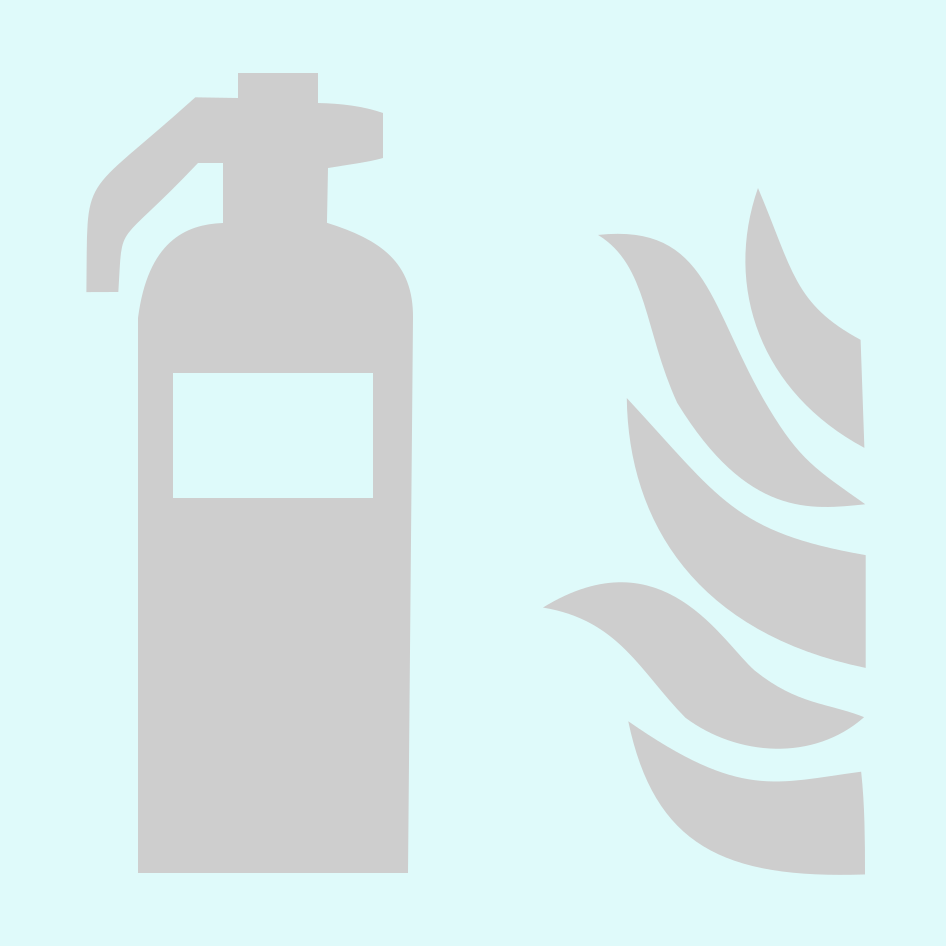

In [161]:
out_img=Image.fromarray(out,mode="RGBA")
display(out_img)
degenerate.save("test.png")

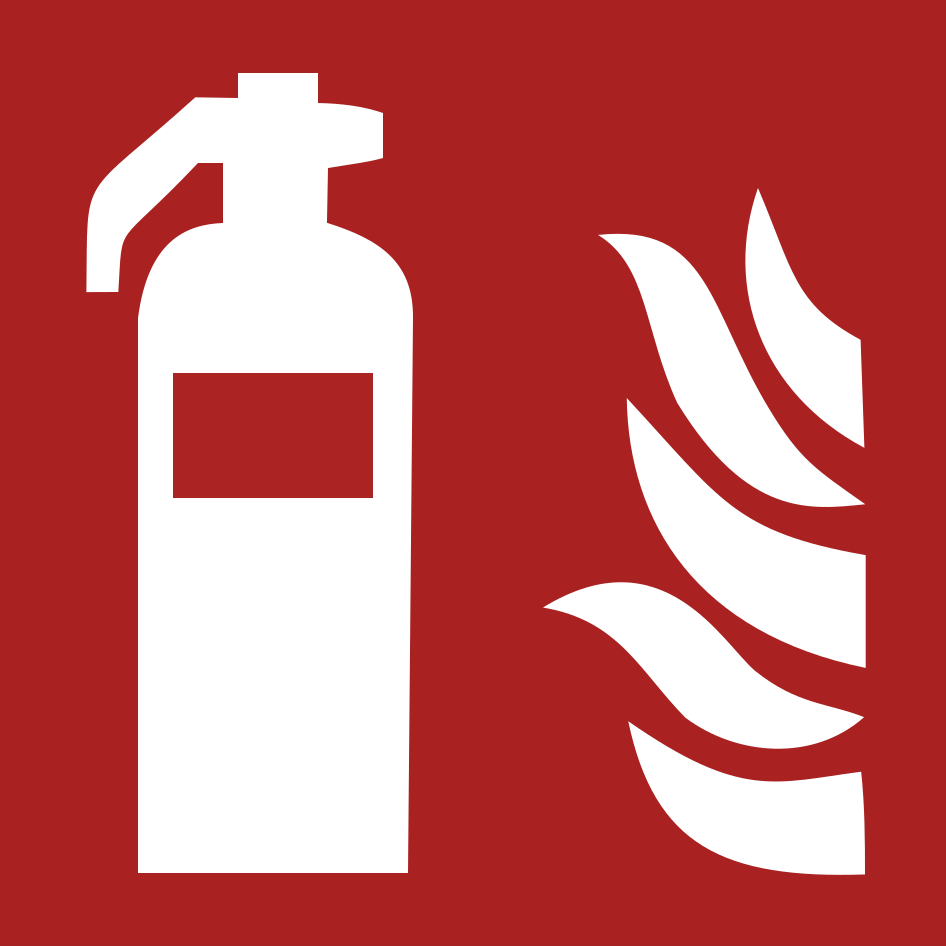

In [148]:
out_img=Image.fromarray(image1,mode="RGBA")
display(out_img)


The set difference between array_1 and array_2 is:
 []


In [108]:
out.astype(int)


array([[[ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        ...,
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255]],

       [[ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        ...,
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255]],

       [[ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        ...,
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255]],

       ...,

       [[ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        ...,
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255]],

       [[ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        ...,
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255],
        [ 33,   6,   6, 255]],

       [[ 33

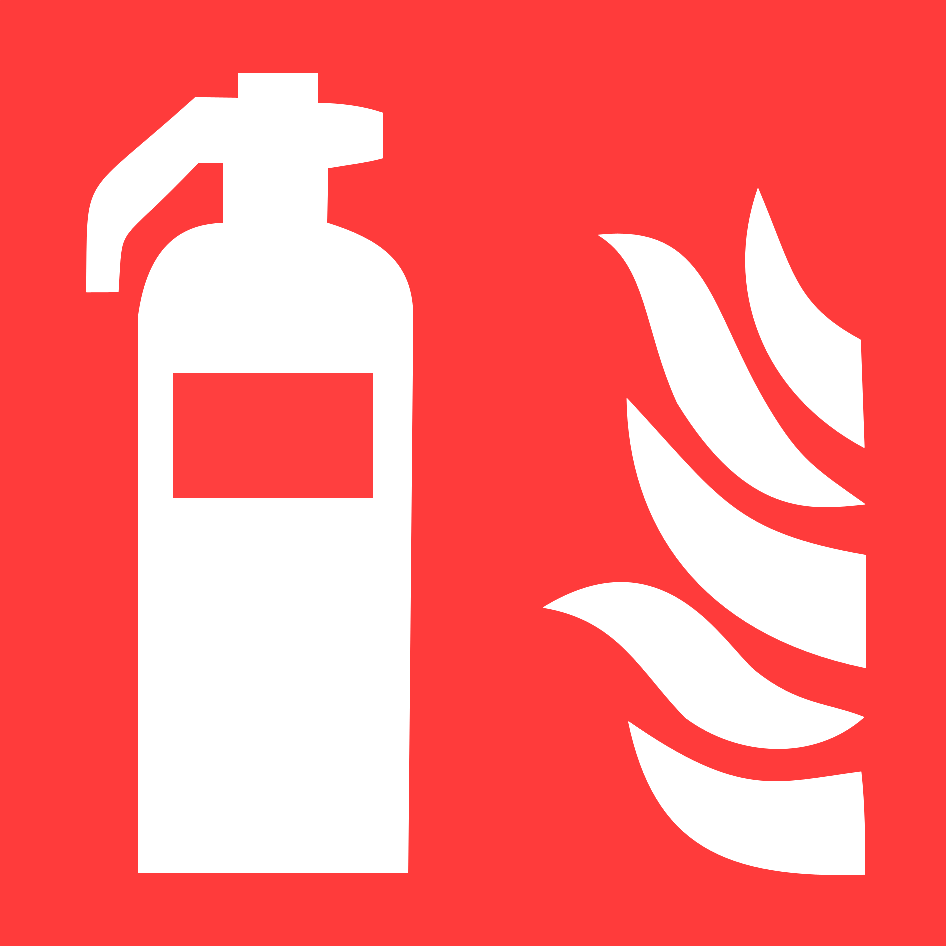

In [65]:

display(image_bright)

In [175]:
mean = int(ImageStat.Stat(image.convert("L")).mean[0] + 0.5)
mean

130

In [173]:
Y = 0.299*np.array(image.getchannel("R")) + 0.587*np.array(image.getchannel("G")) + 0.144*np.array(image.getchannel("B"))
print(np.mean(Y))


132.70644952263677


In [166]:
degenerate = Image.new("L", image.size, mean).convert(image.mode)

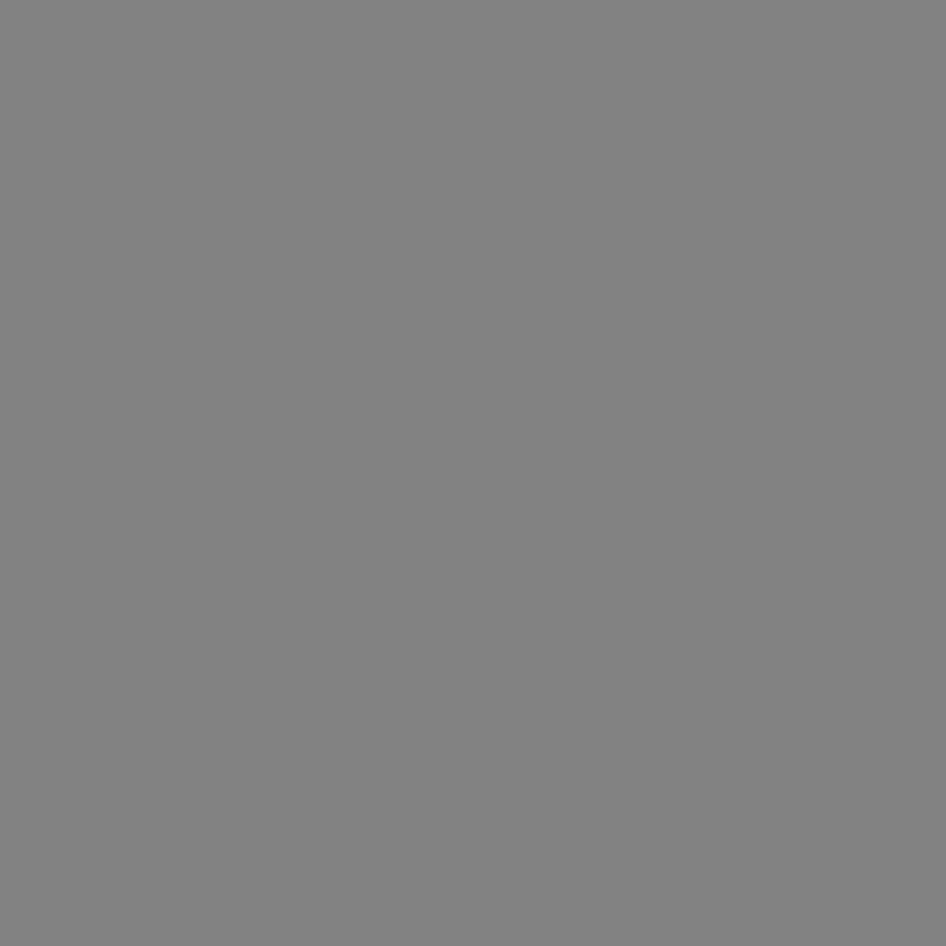

In [167]:
display(degenerate)